<a href="https://colab.research.google.com/github/sokrypton/ColabBio/blob/main/PCA_on_MSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
def parse_fasta(filename, a3m=False):
  '''function to parse fasta file'''

  if a3m:
    # for a3m files the lowercase letters are removed
    # as these do not align to the query sequence
    rm_lc = str.maketrans(dict.fromkeys(string.ascii_lowercase))

  header, sequence = [],[]
  lines = open(filename, "r")
  for line in lines:
    line = line.rstrip()
    if line[0] == ">":
      header.append(line[1:])
      sequence.append([])
    else:
      if a3m: line = line.translate(rm_lc)
      else: line = line.upper()
      sequence[-1].append(line)
  lines.close()
  sequence = [''.join(seq) for seq in sequence]

  return header, sequence

def mk_msa(seqs):
  '''one hot encode msa'''
  alphabet = "ARNDCQEGHILKMFPSTWYV-"
  states = len(alphabet)
  a2n = {a:n for n,a in enumerate(alphabet)}
  msa_ori = np.array([[a2n.get(aa, states-1) for aa in seq] for seq in seqs])
  return np.eye(states)[msa_ori]

In [ ]:
!wget -qnc --no-check-certificate https://gremlin2.bakerlab.org/db/ECOLI/fasta/P23895.fas

In [ ]:
names, seqs = parse_fasta("P23895.fas")
msa = mk_msa(seqs)
msa.shape

(4499, 110, 21)

In [ ]:
msa_flat = msa.reshape(msa.shape[0],-1)
msa_flat.shape

(4499, 2310)

In [ ]:
pca = PCA(n_components=3).fit(msa_flat)
pc = pca.transform(msa_flat)

In [ ]:
pca.get_covariance().shape

(2310, 2310)

In [ ]:
pc.shape

(4499, 3)

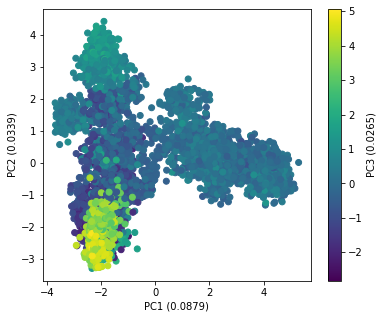

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(pc[:,0], pc[:,1], c=pc[:,2])
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.3})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.3})")
plt.colorbar(label=f"PC3 ({pca.explained_variance_ratio_[2]:.3})")
plt.show()

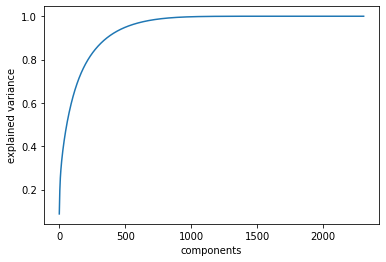

In [ ]:
pca = PCA().fit(msa_flat)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("components")
plt.ylabel("explained variance")
plt.show()